In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from wordcloud import WordCloud
from collections import Counter

In [6]:
df = pd.read_csv(r"/Users/chetanpopli/Desktop/College/Fall 2023/CS584/Project/Restaurant reviews.csv")
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [7]:
df.drop(labels = ['7514'], axis = 1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [8]:
df_count = df.groupby(['Restaurant', 'Rating']).size().reset_index(name='Count')
print(df_count)

            Restaurant Rating  Count
0    10 Downing Street      1      7
1    10 Downing Street      2      5
2    10 Downing Street      3     14
3    10 Downing Street      4     49
4    10 Downing Street      5     25
..                 ...    ...    ...
538            eat.fit      1     27
539            eat.fit      2      7
540            eat.fit      3     15
541            eat.fit      4     21
542            eat.fit      5     30

[543 rows x 3 columns]


In [10]:
df['Review']=df['Review'].apply(str)
df['Review'] = df['Review'].str.lower()
df['Review'] = df['Review'].str.replace('[{}]'.format(string.punctuation), '', regex=True)
df['Review'] = df['Review'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: [word for word in x if word not in stop_words])


In [14]:
df['tokenized_reviews_length'] = df['Review'].apply(len)
num_reviews = len(df)
avg_length = df['tokenized_reviews_length'].mean()
max_length = df['tokenized_reviews_length'].max()
min_length = df['tokenized_reviews_length'].min()

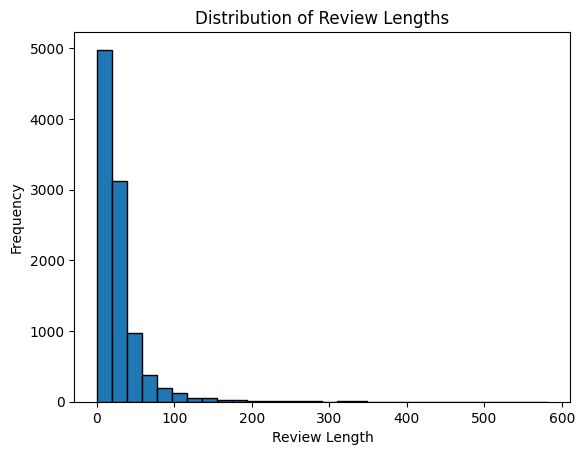

In [16]:
plt.hist(df['tokenized_reviews_length'], bins=30, edgecolor='k')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

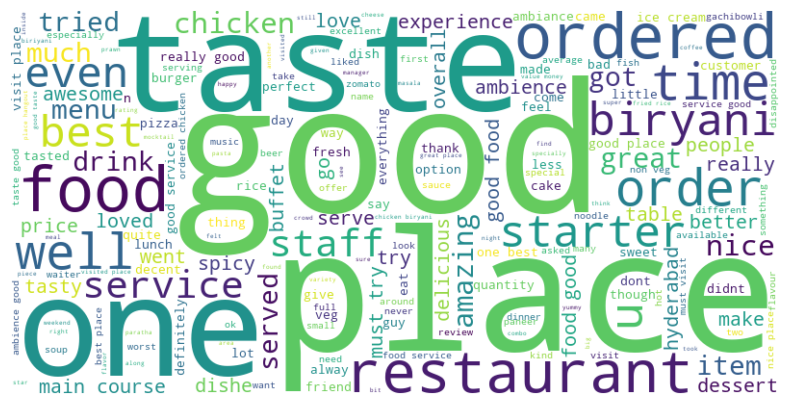

In [17]:
all_words = [word for tokens in df['Review'] for word in tokens]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

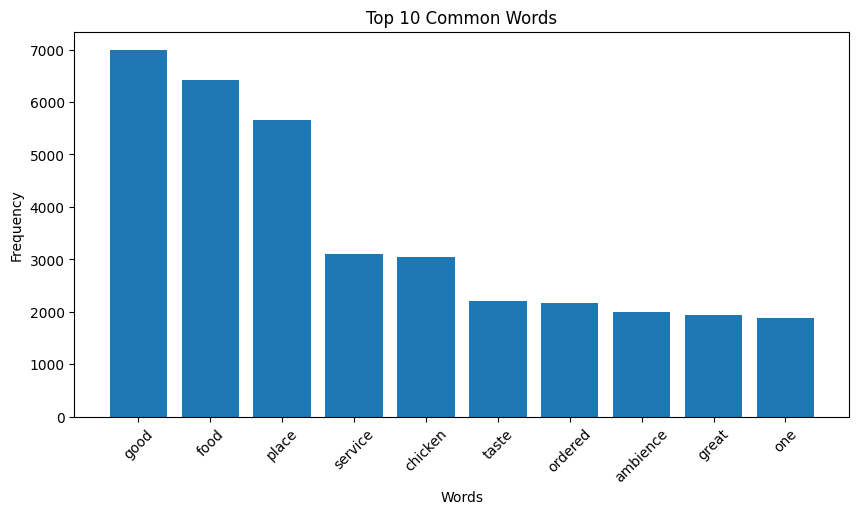

In [18]:
common_words = Counter(all_words).most_common(10)  # Change 10 to your desired number of top words
words, frequencies = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Common Words')
plt.xticks(rotation=45)
plt.show()